## Pesaje de pingüinos

Supongamos que eres un investigador en la Antártida y estudias las poblaciones locales de pingüinos.
Una de tus tareas consiste en controlar el peso medio de los pingüinos, ya que varía a lo largo del año.
No sería práctico pesar a todos los pingüinos del entorno, por lo que tu plan es recoger una muestra aleatoria de 10 pingüinos cada semana, pesarlos y utilizar la muestra para estimar la media de toda la población, lo que se denomina **media poblacional**.

Hay muchas formas de utilizar la muestra para estimar la media poblacional, pero solo consideraremos dos: la **media muestral** y la **mediana muestral**.
Ambas son opciones razonables, pero veamos cuál es mejor y pensemos en lo que entendemos por "mejor".

<br>

A efectos de demostración, supondremos que los pesos de los pingüinos se extraen de una distribución normal con media y desviación estándar conocidas, que denotaré como "mu" y "sigma" y asignaré valores en kilogramos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu = 3.7
sigma = 0.46 # desv std = 0.46, varianza = 0.2116

Estos valores son los **parámetros** de la distribución normal, lo que significa que especifican una distribución concreta.
Dados estos parámetros, podemos utilizar la libreria `NumPy` para simular el proceso de muestreo y generar una muestra de cualquier tamaño.

Por ejemplo, aquí hay una muestra hipotética de 10 pesos.

In [3]:
# Inicialice el generador de números aleatorios para que obtengamos los mismos resultados cada vez.
np.random.seed(1)

In [4]:
sample = np.random.normal(mu, sigma, size=10)
sample

array([4.44719887, 3.41859205, 3.45704099, 3.20643443, 4.09808751,
       2.6412922 , 4.50261341, 3.34984483, 3.84675798, 3.58528963])

Y aquí están la media y la mediana de la muestra.

In [5]:
print(f"Media: {np.mean(sample)}, Mediana:{np.median(sample)}")

Media: 3.6553151902291945, Mediana:3.521165310619601


La media y la mediana son lo suficientemente parecidos como para que nos preguntemos cuál es la mejor estimación.
Para averiguarlo, utilizaremos la siguiente función para generar muestras hipotéticas con el tamaño dado, `n`.

In [6]:
def make_sample(n):
    return np.random.normal(mu, sigma, size=n)

## Experimento #1

Como primer experimento, veamos cómo se comportan la **media** y la **mediana** de la muestra a medida que aumenta el tamaño de la muestra.
Usaremos la función `logspace` de `NumPy` para crear un rango (`ns`) de 10 a 100,000, espaciado uniformemente en una escala logarítmica.



```
numpy.logspace() es una función que crea un array de números espaciados logarítmicamente entre un valor inicial y un valor final dados
```



In [7]:
ns = np.logspace(1, 5).astype(int)
ns

array([    10,     12,     14,     17,     21,     25,     30,     37,
           44,     54,     65,     79,     95,    115,    138,    167,
          202,    244,    294,    355,    429,    517,    625,    754,
          910,   1098,   1325,   1599,   1930,   2329,   2811,   3393,
         4094,   4941,   5963,   7196,   8685,  10481,  12648,  15264,
        18420,  22229,  26826,  32374,  39069,  47148,  56898,  68664,
        82864, 100000])

Podemos usar una comprensión de lista para generar una muestra hipotética para cada valor de `n`, calcular la media y mediana, y recopilar los resultados:

In [8]:
means = [np.mean(make_sample(n)) for n in ns]

In [9]:
medians = [np.median(make_sample(n)) for n in ns]

Una estadística, como la media o la mediana de una muestra, que se utiliza para estimar una propiedad de una población se denomina **estimador**.

<br>

La siguiente figura muestra cómo se comportan estos estimadores a medida que aumentamos el tamaño de la muestra.
La línea horizontal muestra la media real de la población.

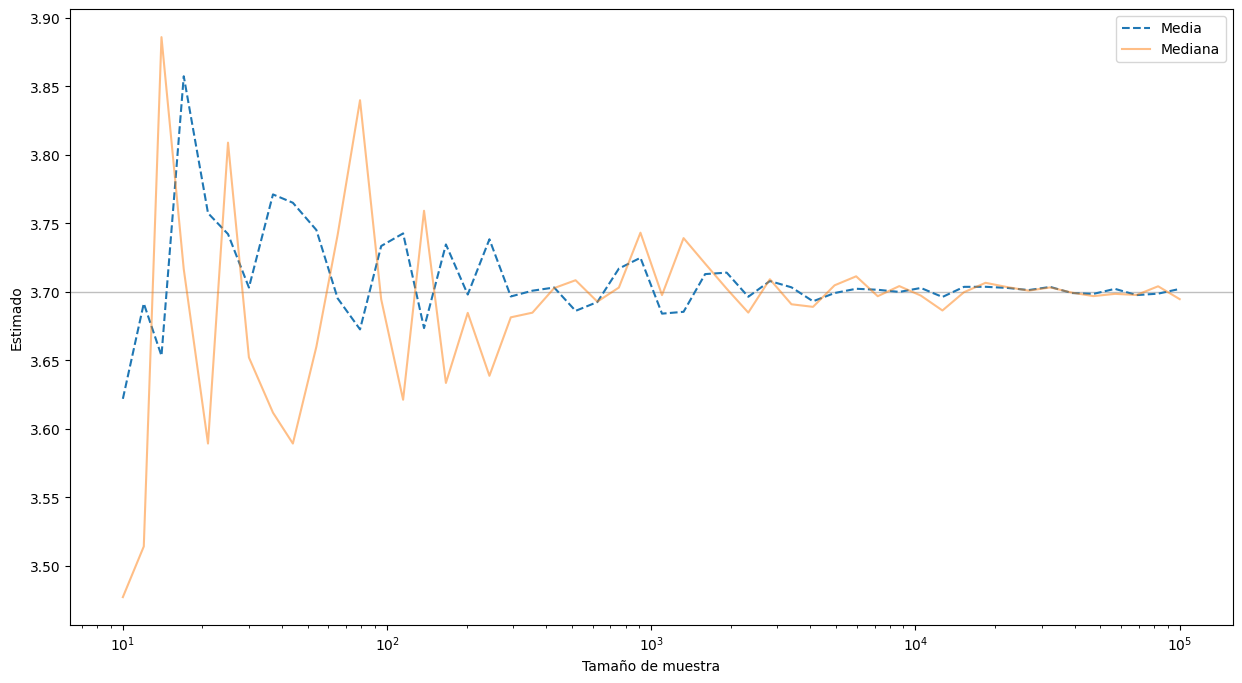

In [10]:
plt.figure(figsize=(15, 8))

plt.axhline(mu, color="gray", lw=1, alpha=0.5) # media real

plt.plot(ns, means, "--", label="Media") # media teorica
plt.plot(ns, medians, alpha=0.5, label="Mediana") # mediana teorica

plt.xlabel("Tamaño de muestra")
plt.ylabel("Estimado")
plt.legend()
plt.xscale("log")

Para ambos estimadores, las estimaciones convergen hacia el valor real a medida que aumenta el tamaño de la muestra.
Esto demuestra que son **consistentes**, lo cual es una de las propiedades que debe tener un buen estimador.
Basándonos en esta propiedad, la media y la mediana parecen igualmente buenas.

En la figura anterior, se puede observar que las estimaciones a veces son demasiado altas y otras demasiado bajas, y parece que la variación es aproximadamente simétrica en torno al valor real.

## Experimento #2

**Esto sugiere otro experimento:** si recopilamos muchas muestras del mismo tamaño y calculamos muchas estimaciones, ¿cuál es la media de las estimaciones?

El siguiente bucle simula este escenario generando **10,001** muestras de **10** pingüinos y calculando la **media** de cada muestra.

In [11]:
means = [np.mean(make_sample(n=10)) for i in range(10001)]

np.mean(means).item()

3.70034508492869

El promedio de las medias se aproxima a la media real que utilizamos para generar las muestras: **3.7 kg**.

El siguiente bucle simula el mismo escenario, pero esta vez calcula la mediana de cada muestra.

In [12]:
medians = [np.median(make_sample(n=10)) for i in range(10001)]

np.mean(medians).item()

3.701214089907223

El promedio de estas medianas hipotéticas también es muy cercano a la media real de la población.

<br>

Estos resultados demuestran que la media y la mediana de la muestra son estimadores **sin sesgo**, lo que significa que son correctas en promedio.

La palabra **"sesgo"** tiene diferentes significados en diferentes contextos, lo que puede ser motivo de confusión.
En este contexto, **"sin sesgo"** significa que la media de las estimaciones es el valor real.

## Experimento #3

Hasta ahora, hemos demostrado que ambos estimadores son consistentes y sin sesgo, pero aún no está claro cuál es mejor.

Probemos con un experimento más: veamos qué estimador es más preciso.
La palabra **"preciso"** también tiene diferentes significados en diferentes contextos; como forma de cuantificarlo, consideremos el **error cuadrático medio** (MSE).

$$
MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

La siguiente función calcula las diferencias entre las **estimaciones** $\hat{y}_i$ y el **valor real** $y_i$, y devuelve la media de los cuadrados de estos errores.

In [13]:
def mse(estimates, actual):
    """Error cuadrático medio de una secuencia de estimaciones."""
    errors = np.asarray(estimates) - actual
    return np.mean(errors**2)

Tenga en cuenta que solo podemos calcular el MSE si conocemos el valor real.

En la práctica, normalmente no lo sabemos; después de todo, si conociéramos el valor real, no tendríamos que estimarlo.
Pero en nuestro experimento, sabemos que la media real de la población es de **3.7 kg**, por lo que podemos utilizarla para calcular el MSE de las **medias muestrales**.

In [14]:
# mu = 3.7

mse(means, mu).item()

0.020871984891289382

Si tenemos muestras de tamaño **10** y utilizamos la media muestral para estimar la media poblacional, el error cuadrático medio es de aproximadamente **0.021 kilogramos al cuadrado**.

Ahora veamos el MSE de las **medianas muestrales**.

In [15]:
mse(medians, mu).item()

0.029022273128644173

Si utilizamos las medianas muestrales para estimar la media poblacional, el error cuadrático medio es de aproximadamente `0.029 kilogramos` al cuadrado.
En este ejemplo, **la media muestral es mejor que la mediana muestral**; y, en general, si los datos se extraen de una distribución normal, es el *mejor* estimador insesgado de la media poblacional, en el sentido de que **minimiza el MSE**.

<br>

Minimizar el MSE es una buena propiedad que debe tener un estimador, pero el MSE no siempre es la mejor manera de resumir los errores.
Por un lado, es difícil de interpretar.
En este ejemplo, las unidades del MSE son kilogramos al cuadrado, por lo que es difícil decir qué significa eso.

Una solución es utilizar la raíz cuadrada del **MSE**, llamada "error cuadrático medio", o **RMSE**.

$$
RMSE = \sqrt{ \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 }
$$


Otra opción es utilizar la media de los valores absolutos de los errores, llamada "error absoluto medio" o **MAE**.

$$
MAE = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$

La siguiente función calcula el MAE para una secuencia de estimaciones.

In [16]:
def mae(estimates, actual):
    """Mean absolute error of a sequence of estimates."""
    errors = np.asarray(estimates) - actual
    return np.mean(np.abs(errors))

Aquí está la MAE de las medias muestrales.

In [17]:
mae(means, mu).item()

0.11540433749505272

Y las medianas muestrales.

In [18]:
mae(medians, mu).item()

0.13654429774596036

En promedio, esperamos que la **media muestral** se desvíe en aproximadamente **0.115 kg** y que la **mediana muestral** se desvíe en **0.137 kg**.

Por lo tanto, la **media muestral** es probablemente la mejor opción, al menos para este ejemplo.

---

# Robustez (media - mediana)

Ahora consideremos un escenario diferente.
Supongamos que, en el `2%` de las ocasiones, cuando intentas pesar un pingüino, este pulsa accidentalmente el botón de unidades de la báscula y el peso se registra en libras en lugar de en kilogramos.
Suponiendo que el error pasa desapercibido, introduce un valor atípico (outlier) en la muestra.

<br>

La siguiente función simula este escenario, multiplicando el `2%` de los pesos por el factor de conversión de `2.2 libras por kilogramo`.

In [19]:
def make_sample_with_errors(n):
    sample = np.random.normal(mu, sigma, size=n)
    factor = np.random.choice([1, 2.2], p=[0.98, 0.02], size=n)
    return sample * factor

Para ver qué efecto tiene esto en la distribución, generaremos una muestra grande.

In [20]:
sample = make_sample_with_errors(n=1000)

Para trazar la distribución de la muestra, utilizaremos lo que se conoce como Kernel Density Estimation (KDE). La cual es una forma de estimar la función de densidad de probabilidad (PDF).

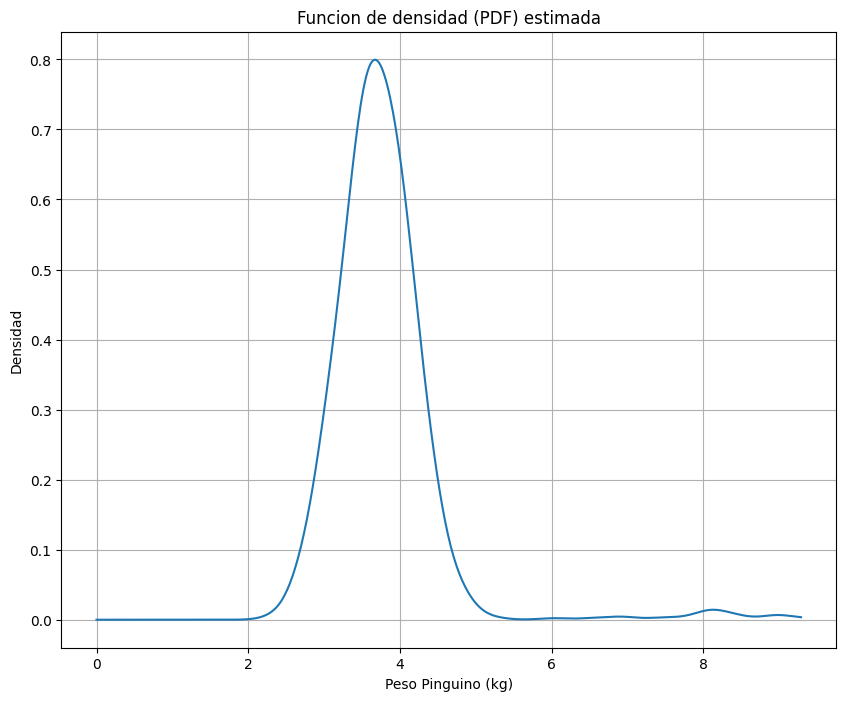

In [21]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(sample)

eval_points = np.linspace(0, max(sample), 500) #dominio
pdf_values = kde.pdf(eval_points)

plt.figure(figsize=(10, 8))
plt.plot(eval_points, pdf_values)
plt.xlabel("Peso Pinguino (kg)")
plt.ylabel("Densidad")
plt.title("Funcion de densidad (PDF) estimada")
plt.grid(True)
plt.show()

Además del modo cercano a los `3.7 kg`, los errores de medición introducen un segundo modo cercano a los `8 kg`.

Ahora repitamos el experimento anterior, simulando muchas muestras con tamaño `10`, calculando la `media` de cada muestra y, a continuación, calculando la `media de las medias de las muestras`.

In [22]:
means = [np.mean(make_sample_with_errors(n=10)) for i in range(10001)]

np.mean(means).item()

3.786352945690677

Los errores de medición hacen que la `media muestral` sea, en promedio, superior a `3.7 kg`.

Ahora veamos el mismo experimento utilizando `medianas muestrales`.

In [23]:
medians = [np.median(make_sample_with_errors(n=10)) for i in range(10001)]

np.mean(medians).item()

3.7121869836715353

La `media de las medianas de la muestra` también es superior a `3.7 kg`, pero la diferencia no es tan grande.
Si comparamos el `MSE` de las estimaciones, vemos que las `medianas de la muestra son sustancialmente más precisas`.


In [24]:
print(f"MSE media: {mse(means, mu).item()}, MSE mediana: {mse(medians, mu).item()}")

MSE media: 0.06853430354724438, MSE mediana: 0.031164467796883758


Si las mediciones proceden realmente de una distribución normal, la media de la muestra minimiza el MSE, pero este escenario viola esa suposición, por lo que la media de la muestra no minimiza el MSE.

La `mediana de la muestra es menos sensible a los valores atípicos`, por lo que es menos sesgada y su MSE es menor.

<br>

Los estimadores que tratan bien los valores atípicos, y violaciones similares de los supuestos, se consideran **robustos**.



---

# Estimación de Varianza

Como otro ejemplo, supongamos que queremos estimar la varianza en los pesos de los pingüinos. Hay dos formas de calcular la varianza de una muestra.

La razón por la que hay dos formas de calcular la varianza de una muestra es que una es un `estimador sesgado` de la `varianza poblacional`, y la otra es `insesgada`.  

<br>

La siguiente función calcula el `estimador sesgado`, que es la suma de las desviaciones cuadráticas dividida por `n`.

$$
s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

In [25]:
def biased_var(xs):
    # computa la varianza con n en el denominador
    n = len(xs)
    deviations = xs - np.mean(xs)
    return np.sum(deviations**2) / n

Para probarlo, simularemos muchas muestras con un tamaño de `10`, calcularemos la varianza sesgada de cada muestra y, a continuación, calcularemos la `media de las varianzas`.

In [26]:
biased_vars = [biased_var(make_sample(n=10)) for i in range(10001)]

np.mean(biased_vars).item()

0.19049277659404473

El resultado es aproximadamente `0.19`, pero en este caso sabemos que la varianza real de la población es de aproximadamente $\sigma^2 = (0.46)^2 = 0.21$, por lo que esta versión de la `varianza muestral` es demasiado baja en promedio, lo que confirma que es `sesgada`.

In [27]:
actual_var = sigma**2
actual_var

0.2116

La siguiente función calcula el `estimador insesgado`, que es la suma de las desviaciones al cuadrado dividida por `n-1`.

$$
s^2 = \frac{1}{(n-1)} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

In [28]:
def unbiased_var(xs):
    # computa la varianza con n-1 en el denominador
    n = len(xs)
    deviations = xs - np.mean(xs)
    return np.sum(deviations**2) / (n - 1)

Podemos probarlo generando muchas muestras y calculando la varianza insesgada para cada una de ellas.

In [29]:
unbiased_vars = [unbiased_var(make_sample(n=10)) for i in range(10001)]

np.mean(unbiased_vars).item()

0.21159109492300626

El `promedio de las varianzas insesgadas de las muestras es muy cercano al valor real`, que es lo que esperamos si es `insesgado`.

* Con un `tamaño de muestra de 10`, la diferencia entre los estimadores sesgados y no sesgados es de aproximadamente el `10%`, lo que podría ser significativo.

* Con un `tamaño de muestra de 100`, la diferencia es solo del `1%`, lo que es lo suficientemente pequeño como para que probablemente no importe en la práctica.

In [30]:
n = 10

biased_vars = np.mean([biased_var(make_sample(n=n)) for i in range(10001)])
unbiased_vars = np.mean([unbiased_var(make_sample(n=n)) for i in range(10001)])


print(f"{(1 - (biased_vars / unbiased_vars))*100:3f}%")

9.018619%


In [31]:
n = 100

biased_vars = np.mean([biased_var(make_sample(n=n)) for i in range(10001)])
unbiased_vars = np.mean([unbiased_var(make_sample(n=n)) for i in range(10001)])


print(f"{(1 - (biased_vars / unbiased_vars))*100:3f}%")

0.813364%


---
---
# Distribuciones muestrales

Hasta ahora hemos estado trabajando con datos simulados, suponiendo que el peso de los pingüinos se extrae de una distribución normal con parámetros conocidos.
Ahora veamos qué sucede con datos reales.

Entre 2007 y 2010, investigadores de la estación Palmer en la Antártida midieron y pesaron 342 pingüinos de poblaciones locales.
Los datos que recopilaron están disponibles gratuitamente.

In [32]:
def from_seq(seq, name=None, normalize=True, sort=True, ascending=True, dropna=True, na_position="last", convert_to="PMF"):
  """Crea un PMF a partir de una secuencia de valores.
  Args:
      seq: iterable
      normalize: si se debe normalizar la serie (i.e, Pmf), por defecto True
      sort: si se debe ordenar la serie por valores, por defecto True
      ascending: si se debe ordenar en orden ascendente, por defecto True
      dropna: si se deben eliminar los valores NaN, por defecto True
      na_position: si es 'first', coloca los NaNs al principio;
                  si es 'last', coloca los NaNs al final.
      convert_to: si es 'Freq', Crea una tabla de frecuencia;
                  si es 'PMF' (default), crea una funcion de masa de probabilidad;
                  si es 'CDF', crea una función de distribución acumulada.

  Returns: pd.Series
  """
  if convert_to == "Freq":
    normalize=False

  # compute the value counts
  series = pd.Series(seq, name=name).value_counts(normalize=normalize, sort=sort, dropna=dropna)

  # sort in place, if desired
  if sort:
    series.sort_index(inplace=True, ascending=ascending, na_position=na_position)

  if convert_to == "CDF":
    series = np.cumsum(series)

  return series

def get_qs(Tab):
    """Obtener las cantidades.

    Returns: NumPy array
    """
    return Tab.index.values

def get_ps(Tab):
    """Obtener las probabilidades.

    Returns: NumPy array
    """
    return Tab.values

def plot_cdf_plots(cdf_model, cdf_data, labels=["model", "data"], xlabel="x", ylabel="CDF", title=None):
    """Crea un gráfico comparativo de dos CDFs.
    Args:
        cdf_model: CDF de distribucion que presuntamente se aproxima al comportamiento de los datos
        cdf_data: CDF de los datos a analisar
        labels: Etiquetas a ser mostradas en el grafico, i.e., modelo y datos.
        xlabel: Etiqueta a mostrar en el eje x
        ylabel: Etiqueta a mostrar en el eje y
        tittle: Titulo que aparecera en el grafico.
    """
    plt.figure(figsize=(8, 5))

    plt.plot(get_qs(cdf_model),get_ps(cdf_model), linestyle=":", color="gray", label=labels[0])
    plt.plot(get_qs(cdf_data),get_ps(cdf_data), label=labels[1])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.legend()

La siguiente celda descarga los datos de un repositorio creado por Allison Horst.

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.

Los datos se recopilaron como parte de la investigación que dio lugar a este artículo: Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

In [33]:
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins_raw.csv"

penguins = pd.read_csv(url).dropna(subset=["Body Mass (g)"])
penguins.shape

(342, 17)

El conjunto de datos incluyo tres especies de pinguinos

In [34]:
penguins["Species"].value_counts()

,count
Species,
Adelie Penguin (Pygoscelis adeliae),151
Gentoo penguin (Pygoscelis papua),123
Chinstrap penguin (Pygoscelis antarctica),68


Para el primer ejemplo vamos a seleccionar solo los pingüinos barbijo (Chinstrap)

In [35]:
chinstrap = penguins.query('Species.str.startswith("Chinstrap")')

Usaremos esta función para graficar las PDFs estimadas.

In [36]:
from scipy.stats import gaussian_kde

def plot_kde(sample, name="estimated density", title="Funcion de densidad (PDF) estimada", xlabel="", ylabel="Densidad"):
    kde = gaussian_kde(sample)

    m, s = np.mean(sample), np.std(sample)
    domain = m - 4 * s, m + 4 * s

    eval_points = np.linspace(domain[0], domain[1], 500) #dominio
    pdf_values = kde.pdf(eval_points)

    plt.figure(figsize=(10, 8))
    plt.plot(eval_points, pdf_values, label=name) # Estimacion
    plt.axvline(m, color="gray", ls=":") #media de la muestra
    plt.text(m + 0.001, 0, f"Mean: {m:.3f}", rotation=90, va='center', ha='left') # Agrega texto cerca de la linea axvline
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

Aquí está la distribución del peso de los pingüinos barbijo en kilogramos.
La línea punteada vertical muestra la media de la muestra.

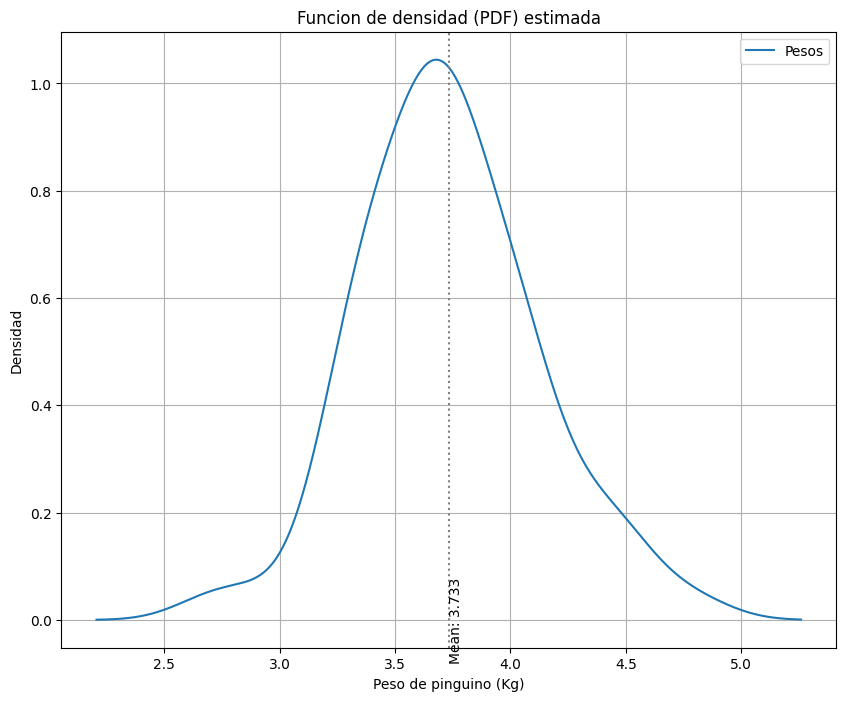

In [37]:
weights = chinstrap["Body Mass (g)"] / 1000 #transformando gramos a Kilogramos
plot_kde(weights, "Pesos", xlabel="Peso de pinguino (Kg)")

Para ver si los pesos de los pingüinos siguen una distribución normal, calcularemos la CDF empírica de los datos. Calcularemos la CDF analítica de una distribución normal con la misma media y desviación estándar.

In [38]:
from scipy.stats import norm

m, s = weights.mean(), weights.std()

dist = norm(m, s)
qs = np.linspace(m - 3.5 * s, m + 3.5 * s)
ps = dist.cdf(qs)

cdf_norm = pd.Series(ps, index=qs)

In [39]:
cdf_weights = from_seq(weights, convert_to='CDF')

Así es como se ve la CDF de los datos en comparación con el modelo normal.

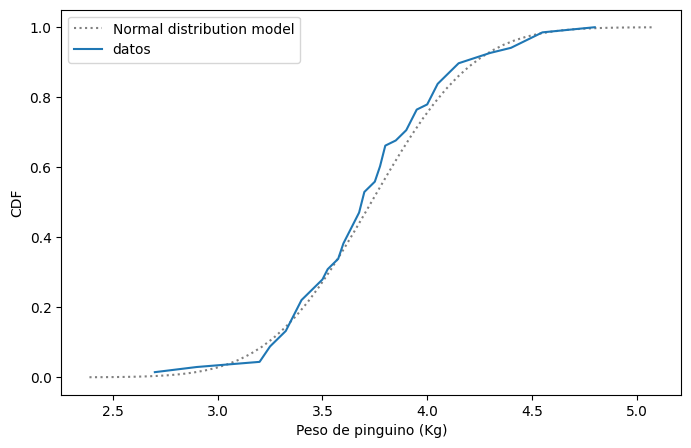

In [40]:
plot_cdf_plots(cdf_norm, cdf_weights, labels=["Normal distribution model", "datos"], xlabel="Peso de pinguino (Kg)")

La media muestral es aproximadamente...

In [41]:
sample_mean = np.mean(weights)

sample_mean.item()

3.733088235294118

Si se le pide que calcule la media poblacional, `3.7 kg` es una opción razonable, pero **¿qué grado de precisión tiene esa estimación?**

Una forma de responder a esa pregunta es calcular la **distribución muestral de la media**, que muestra cuánto varía la media estimada de una muestra a otra.
Si conociéramos la media real y la desviación estándar de la población, podríamos modelar el proceso de muestreo y calcular la distribución muestral.
Pero si conociéramos la media real de la población, ¡no tendríamos que estimarla!

Afortunadamente, existe una forma sencilla de aproximar la distribución muestral, llamada **remuestreo**.
La idea central es utilizar la muestra para crear un modelo de la población y, a continuación, utilizar el modelo para simular el proceso de muestreo.

Más concretamente, utilizaremos el **remuestreo paramétrico**, lo que significa que utilizaremos la muestra para estimar los parámetros de la población y, a continuación, utilizaremos una distribución teórica para generar nuevas muestras.

La siguiente función implementa este proceso con una distribución normal.
Obsérvese que las nuevas muestras tienen el mismo tamaño que las originales.

In [42]:
def resample(sample):
    # Generar una muestra a partir de una distribución normal
    m, s = np.mean(sample), np.std(sample)
    return np.random.normal(m, s, len(sample))

Este bucle utiliza `resample` para generar muchas muestras y calcular la `media` de cada una de ellas.

In [43]:
sample_means = [np.mean(resample(weights)) for i in range(1001)]

La siguiente figura muestra la distribución de estas medias muestrales.

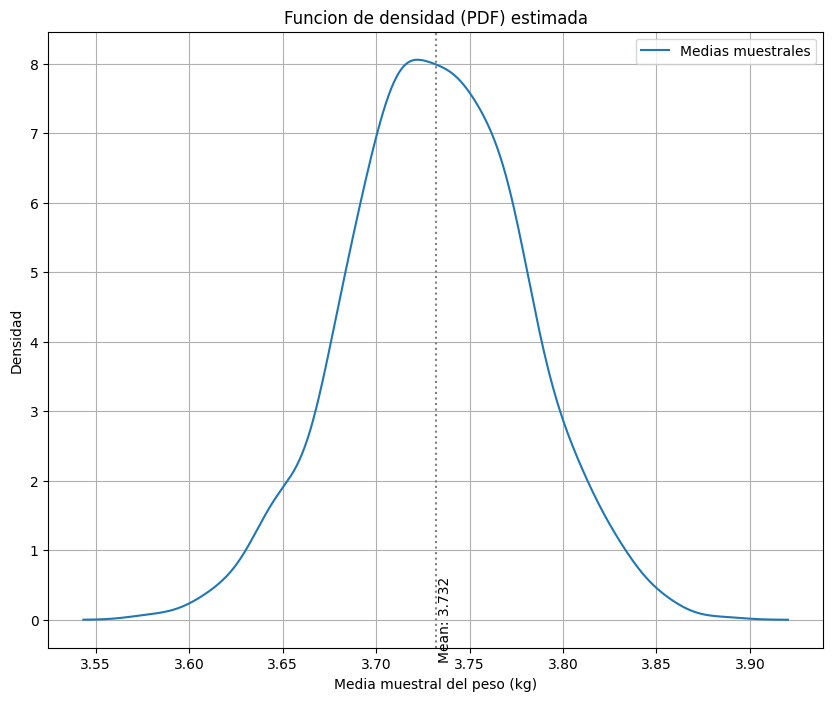

In [44]:
plot_kde(sample_means, "Medias muestrales", xlabel="Media muestral del peso (kg)")

Este resultado se aproxima a la `distribución muestral` de la `media muestral`.

Muestra cuánto esperamos que varíe la `media muestral` si recopilamos muchas muestras del mismo tamaño, **suponiendo que nuestro modelo de la población sea preciso**.

De manera informal, podemos ver que la `media muestral` podría ser tan baja como `3.55`, si recopiláramos otra muestra del mismo tamaño, o tan alta como `3.9`.

## Error estándar

Para cuantificar la amplitud de la distribución muestral, una opción es calcular su `desviación estándar`; el resultado se denomina **error estándar**.

In [45]:
standard_error = np.std(sample_means)

standard_error.item()

0.04711563337438791

En este caso, el `error estándar` es de aproximadamente `0.045 kg`, por lo que si recogemos muchas muestras, esperamos que las `medias muestrales` varíen en torno a `0.045 kg`, de media.

A menudo se confunde el `error estándar` con la `desviación estándar`. Recuerde:

* La `desviación estándar` cuantifica la variación en las mediciones.

* El `error estándar` cuantifica la precisión de una estimación.

En este conjunto de datos, para los pingüinos barbijo (chinstrap), la `desviación estándar del peso de los pingüinos` es de aproximadamente `0.38 kg`.

In [46]:
np.std(weights)

0.3814986213564681

y el `error estándar del peso promedio` es de aproximadamente `0.046 kg`.

La `desviación estándar` indica cuánto varían los pingüinos en cuanto a peso.
El `error estándar` indica la precisión de una estimación.
Son respuestas a preguntas diferentes.

Sin embargo, existe una relación entre ellos.
Si conocemos la `desviación estándar` y el `tamaño de la muestra`, podemos calcular aproximadamente el `error estándar de las medias` de la siguiente manera:

$$
\sigma_{\bar{x}} = SE ≈\frac{\sigma}{\sqrt{n}}
$$

In [47]:
def approximate_standard_error(sample):
    n = len(sample)
    return np.std(sample) / np.sqrt(n)

In [48]:
approximate_standard_error(weights).item()

0.046263503290595163

Este resultado es similar al que obtuvimos mediante el remuestreo.

## Intervalos de confianza

Otra forma de resumir la distribución muestral es calcular un **intervalo de confianza**.

Por ejemplo, un intervalo de confianza del `90%` contiene el 90% de los valores de la distribución muestral, que podemos hallar calculando los `percentiles 5` y `95`.

Este es el `intervalo de confianza del 90%` para el peso medio de los pingüinos barbijo (chinstrap).

In [49]:
ci90 = np.percentile(sample_means, [5, 95])
ci90

array([3.64985057, 3.81028072])

Utilizando la formula tradicional de los Intervalos de Confianza (IC):

$$
IC = \bar{X} \pm t_{\alpha/2, \, n-1} \cdot SE
$$

In [50]:
import numpy as np
from scipy import stats

def intervalo_confianza_tradicional(datos, alpha=0.05):
    """
    Calcula un intervalo de confianza tradicional para la media.
    """
    n = len(datos)
    media_muestral = np.mean(datos)

    # Usamos distribución t de Student
    t = stats.t.ppf(1 - alpha/2, df=n-1)

    error_estandar = np.std(datos, ddof=0)  # Desviación estándar muestral (error estandar)

    lim_inf = media_muestral - t * error_estandar
    lim_sup = media_muestral + t * error_estandar

    return lim_inf.item(), lim_sup.item()

In [51]:
ic = intervalo_confianza_tradicional(sample_means, alpha=0.10)  # Varianza poblacional desconocida
print("IC 90% (usando t-Student):", ic)

IC 90% (usando t-Student): (3.6543089020793085, 3.8094492635804693)


Para interpretar un intervalo de confianza, es tentador decir que hay un **90% de probabilidades de que el valor real del parámetro poblacional se encuentre dentro del intervalo de confianza del 90%**.
En este ejemplo, diríamos que hay un **90% de probabilidades de que la media poblacional de los pingüinos barbijo se encuentre entre 3.66 y 3.81 kg**.

Según una filosofía estricta de la probabilidad llamada **frecuentismo**, esta interpretación no estaría permitida, y en muchos libros de estadística se dice que esta interpretación es errónea.

En mi opinión, esta prohibición es innecesariamente estricta.
Según filosofías razonables de probabilidad, un intervalo de confianza significa lo que la gente espera que signifique: `hay un 90% de probabilidades de que el valor real se encuentre en el intervalo de confianza del 90%`.

Sin embargo, `los intervalos de confianza solo cuantifican la variabilidad debida al muestreo`, es decir, la medición de solo una parte de la población.
La distribución muestral no tiene en cuenta otras fuentes de error, en particular el `sesgo de muestreo` y el `error de medición`.

---

---

# EJERCICIO #1

En deportes como el fútbol y el hockey, el tiempo entre goles tiende a seguir una distribución exponencial (como vimos en el notebook anterior). Supongamos que observamos una muestra de tiempos entre goles. Si asumimos que la muestra proviene de una distribución exponencial, **¿cómo podemos estimar la media real de la distribución?**

Podríamos considerar usar la **media muestral** o la **mediana muestral**. Veamos si alguno de ellos es un estimador consistente y no sesgado.
Para los experimentos, supondremos que la media real del tiempo entre goles es de 10 minutos.

In [52]:
actual_mean = 10

La siguiente función genera una muestra de una distribución exponencial con esta media y el tamaño de muestra especificado:

In [53]:
def make_exponential(n):
    return np.random.exponential(actual_mean, size=n)

Usa esta función para generar muestras con diferentes tamaños `[5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]` y calcular la **media** de cada una. Grafica el resultado obtenido, utiliza `plt.axhline` para mostrar la linea donde deberia converger.

**A medida que `n` aumenta, ¿las medias muestrales convergen a la media real?**

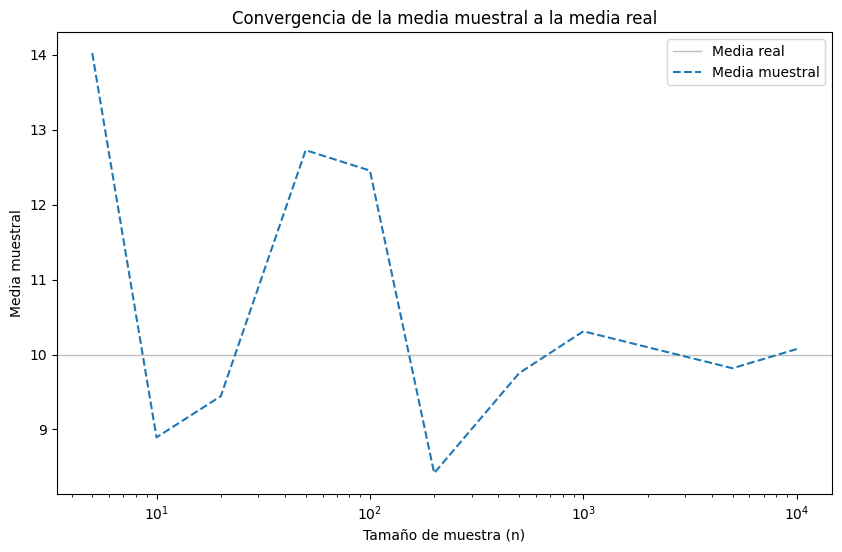

In [55]:
ns = [5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
means = [np.mean(make_exponential(n)) for n in ns]

plt.figure(figsize=(10, 6))
plt.axhline(actual_mean, color="gray", lw=1, alpha=0.5, label="Media real")
plt.plot(ns, means, "--", label="Media muestral")
plt.xlabel("Tamaño de muestra (n)")
plt.ylabel("Media muestral")
plt.xscale("log")
plt.legend()
plt.title("Convergencia de la media muestral a la media real")
plt.show()

Aquí está la **mediana real de una distribución exponencial** con la **media** dada:

In [56]:
actual_median = np.log(2) * actual_mean
actual_median

np.float64(6.931471805599453)

Luego, genera **muestras con diferentes tamaños** (utiliza las mismos tamaños que en la media) y calcula la **mediana** de cada una. Nuevamente, grafica el resultado.

**¿Las medianas muestrales convergen a la mediana real?**

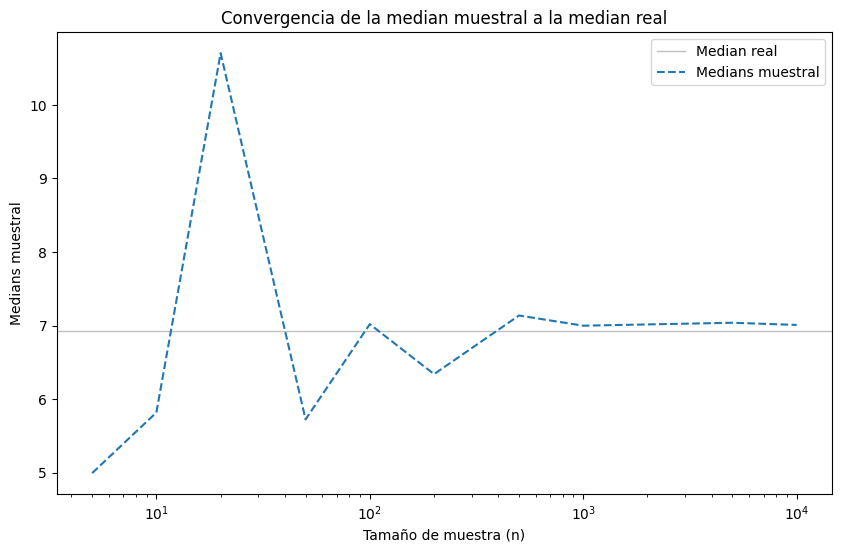

In [61]:
# Tu codigo aqui
ns = [5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
medians = [np.median(make_exponential(n)) for n in ns]

plt.figure(figsize=(10, 6))
plt.axhline(actual_median, color="gray", lw=1, alpha=0.5, label="Median real")
plt.plot(ns, medians, "--", label="Medians muestral")
plt.xlabel("Tamaño de muestra (n)")
plt.ylabel("Medians muestral")
plt.xscale("log")
plt.legend()
plt.title("Convergencia de la median muestral a la median real")
plt.show()

Finalmente:

1. Genera muchas muestras de tamaño `n=10` y verifica si la **media muestral** es un **estimador no sesgado de la media poblacional**.

2. Verifica si la **mediana muestral** es un **estimador no sesgado de la mediana poblacional**.

Para ambos casos, muestre el valor estimado, el valor real, el sesgo estimado y el error estandar.

In [66]:
# Tu codigo aqui
n_samples = 10001
sample_size = 10

means_exp = [np.mean(make_exponential(n=sample_size)) for _ in range(n_samples)]
estimated_mean = np.mean(means_exp)
bias_mean = estimated_mean - actual_mean
standard_error_mean = np.std(means_exp)

print(f"Media muestral (n={sample_size}):")
print(f"  Valor estimado: {estimated_mean:.4f}")
print(f"  Valor real: {actual_mean:.4f}")
print(f"  Sesgo estimado: {bias_mean:.4f}")
print(f"  Error estándar: {standard_error_mean:.4f}")

medians_exp = [np.median(make_exponential(n=sample_size)) for _ in range(n_samples)]
estimated_median = np.mean(medians_exp)
bias_median = estimated_median - actual_median
standard_error_median = np.std(medians_exp)

print(f"\nMediana muestral (n={sample_size}):")
print(f"  Valor estimado: {estimated_median:.4f}")
print(f"  Valor real: {actual_median:.4f}")
print(f"  Sesgo estimado: {bias_median:.4f}")
print(f"  Error estándar: {standard_error_median:.4f}")

Media muestral (n=10):
  Valor estimado: 9.9988
  Valor real: 10.0000
  Sesgo estimado: -0.0012
  Error estándar: 3.1572

Mediana muestral (n=10):
  Valor estimado: 7.4432
  Valor real: 6.9315
  Sesgo estimado: 0.5117
  Error estándar: 3.1052


**¿Que podemos concluir?¿La media es un estimador sesgado? ¿La mediana es un estimador sesgado?**



```
# Tu respuesta va aqui
```




---
---
# EJERCICIO #2



Anteriormente, hemos probado un **estimador sesgado** de la **varianza** y hemos demostrado que, efectivamente, es sesgado.
También hemos demostrado que el estimador insesgado es insesgado.
Ahora probemos con la desviación estándar.

Para estimar la **desviación estándar** de una población, podemos calcular la **raíz cuadrada del estimador sesgado o insesgado** de la **varianza**, de la siguiente manera:

In [67]:
def biased_std(sample):
    # Square root of the biased estimator of variance
    var = biased_var(sample)
    return np.sqrt(var)

In [68]:
def unbiased_std(sample):
    # Square root of the unbiased estimator of variance
    var = unbiased_var(sample)
    return np.sqrt(var)

In [69]:
def make_sample(n):
    return np.random.normal(mu, sigma, size=n)

Utiliza la funcion `make_sample` para calcular muchas muestras de tamaño `10` a partir de una distribución normal con **media** `3.7` y **desviación estándar** `0.46`.

Comprueba si alguna de ellas es un estimador insesgado de la desviación estándar. Estima la diferencia porcentual entre el estimador sesgado y no-sesgado.

In [ ]:
mu, sigma = 3.7, 0.46

In [74]:
n_samples = 10001
sample_size = 10

biased_stds = [biased_std(make_sample(n=sample_size)) for _ in range(n_samples)]
unbiased_stds = [unbiased_std(make_sample(n=sample_size)) for _ in range(n_samples)]

estimated_biased_std = np.mean(biased_stds)
estimated_unbiased_std = np.mean(unbiased_stds)
actual_std = sigma

print(f"Estimador sesgado de la desviación estándar (n={sample_size}):")
print(f"  Valor estimado (promedio): {estimated_biased_std:.4f}")
print(f"  Valor real (sigma): {actual_std:.4f}")
print(f"  Sesgo estimado: {estimated_biased_std - actual_std:.4f}")

print(f"\nEstimador insesgado de la desviación estándar (n={sample_size}):")
print(f"  Valor estimado (promedio): {estimated_unbiased_std:.4f}")
print(f"  Valor real (sigma): {actual_std:.4f}")
print(f"  Sesgo estimado: {estimated_unbiased_std - actual_std:.4f}")

percentage_difference = ((estimated_unbiased_std - estimated_biased_std) / estimated_unbiased_std) * 100

print(f"\nDiferencia porcentual entre el estimador insesgado y sesgado: {percentage_difference:.2f}%")

Estimador sesgado de la desviación estándar (n=10):
  Valor estimado (promedio): 0.4245
  Valor real (sigma): 0.4600
  Sesgo estimado: -0.0355

Estimador insesgado de la desviación estándar (n=10):
  Valor estimado (promedio): 0.4480
  Valor real (sigma): 0.4600
  Sesgo estimado: -0.0120

Diferencia porcentual entre el estimador insesgado y sesgado: 5.26%


---
---
# EJERCICIO #3

El conjunto de datos del Sistema de Vigilancia de Factores de Riesgo Conductual (BRFSS) incluye la altura y el peso autoinformados de una muestra de adultos en los Estados Unidos.

In [75]:
from os.path import basename, exists
from urllib.request import urlretrieve
def download(url):
    filename = basename(url)
    if not exists(filename):
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/CDBRFS08.ASC.gz")

Downloaded CDBRFS08.ASC.gz


In [76]:
def clean_brfss(df):
    """Recodifica las variables BRFSS.
    Args:
        df: DataFrame que contiene los datos de BRFSS limpios.
    """
    df["age"] = df["age"].replace([7, 9], np.nan)
    df["htm3"] = df["htm3"].replace([999], np.nan)
    df["wtkg2"] = df["wtkg2"].replace([99999], np.nan) / 100
    df["wtyrago"] = df.wtyrago.replace([7777, 9999], np.nan)
    df["wtyrago"] = df.wtyrago.apply(lambda x: x / 2.2 if x < 9000 else x - 9000)

def read_brfss(filename="CDBRFS08.ASC.gz", compression="gzip", nrows=None):
    """Lee los datos BRFSS.
    Args:
        filename: string que indica la ruta al archivo de datos.
        compression: string que indica el tipo de compresión.
        nrows: número entero opcional que indica el número de filas que se van a leer, o None para leer todas.
    Returns:
        DataFrame: BRFSS data with cleaned variables.
    """
    # nombre y aspectos de columnas en
    # https://www.cdc.gov/brfss/annual_data/2008/varLayout_table_08.html
    var_info = [
        ("age", 100, 102, int),
        ("sex", 142, 143, int),
        ("wtyrago", 126, 130, int),
        ("finalwt", 798, 808, int),
        ("wtkg2", 1253, 1258, int),
        ("htm3", 1250, 1253, int),
    ]
    columns = ["name", "start", "end", "type"]
    variables = pd.DataFrame(var_info, columns=columns)

    colspecs = variables[["start", "end"]].values.tolist()
    names = variables["name"].tolist()

    df = pd.read_fwf(
        filename,
        colspecs=colspecs,
        names=names,
        compression=compression,
        nrows=nrows,
    )

    clean_brfss(df)
    return df

Utilice estos datos para estimar la `altura media` de los hombres adultos.
Utilice la **funcion `resample`** para aproximar la distribución muestral y calcular un `intervalo de confianza` del `90%`.

In [77]:
male = read_brfss().query("sex == 1")
heights = male["htm3"]
heights.describe()

,htm3
count,154407.000000
mean,178.066221
std,7.723563
min,61.000000
25%,173.000000
50%,178.000000
75%,183.000000
max,236.000000


In [78]:
def resample(sample):
    # Generar una muestra a partir de una distribución normal
    m, s = np.mean(sample), np.std(sample)
    return np.random.normal(m, s, len(sample))

In [ ]:
#Tu codigo va aqui



In [ ]:
#Tu codigo va aqui

Dado que el tamaño de la muestra es muy grande, el intervalo de confianza es muy pequeño, lo que significa que la variabilidad debida al muestreo aleatorio es pequeña.
Sin embargo, otras fuentes de error podrían ser mayores. **`¿Qué otras fuentes de error cree que afectan a los resultados?`**

`Tu respuesta aqui`

Media muestral (n=10):
  Valor estimado: 9.9915
  Valor real: 10.0000
  Sesgo estimado: -0.0085
  Error estándar: 3.1841

Mediana muestral (n=10):
  Valor estimado: 7.4400
  Valor real: 6.9315
  Sesgo estimado: 0.5085
  Error estándar: 3.1149
